# Music playlist database

The project relies on the Chinook playlist database provided by Udacity. It answers three simple questions to show my proficiency in SQL for data mining. Here is the ERD of the database in order to understand how tables are joined to one another: 

## What are the three most preferred genres?


In [ ]:
SELECT

  music_type,

  SUM(avg_total_sales) AS sum_avg_total_sales_by_genre,

  CASE

    WHEN SUM(avg_total_sales) >= 20 THEN 'Top'

    WHEN SUM(avg_total_sales) > 10 AND

      SUM(avg_total_sales) <= 20 THEN 'Medium'

    ELSE 'Low'

  END AS level_sales

FROM (SELECT DISTINCT

  Artist.Name AS artist_name,

  Genre.Name AS music_type,

  COUNT(Album.AlbumId) AS total_album,

  AVG(InvoiceLine.UnitPrice * InvoiceLine.Quantity) AS avg_total_sales

FROM Artist

JOIN Album

  ON Artist.ArtistId = Album.ArtistId

JOIN Track

  ON Album.AlbumId = Track.AlbumId

JOIN Genre

  ON Track.GenreId = Genre.GenreId

JOIN InvoiceLine

  ON Track.TrackId = InvoiceLine.TrackId

JOIN Invoice

  ON InvoiceLine.InvoiceId = Invoice.InvoiceId

GROUP BY Artist.Name) sub

GROUP BY music_type

ORDER BY sum_avg_total_sales_by_genre DESC;

![Screen-Shot-2020-03-21-at-12.50.11-PM.png](https://loicchamplong.com/wp-content/uploads/2020/03/Screen-Shot-2020-03-21-at-12.50.11-PM.png)

We looked into the Chinook database to find out what was the volume of sales for each genre and found out what was the most important. It turns out that Rock is by far the most popular music with an average of 47.52 USD in the total of sales. 

It is almost 70 percent more than their second most profitable genre: Classical (32,67 USD average). The third most popular genre is Latin with 23,76 USD on average. 

It is an important insight in terms of sales and marketing efforts, the company can put more efforts and budget into the most popular genres to boost the sales. 

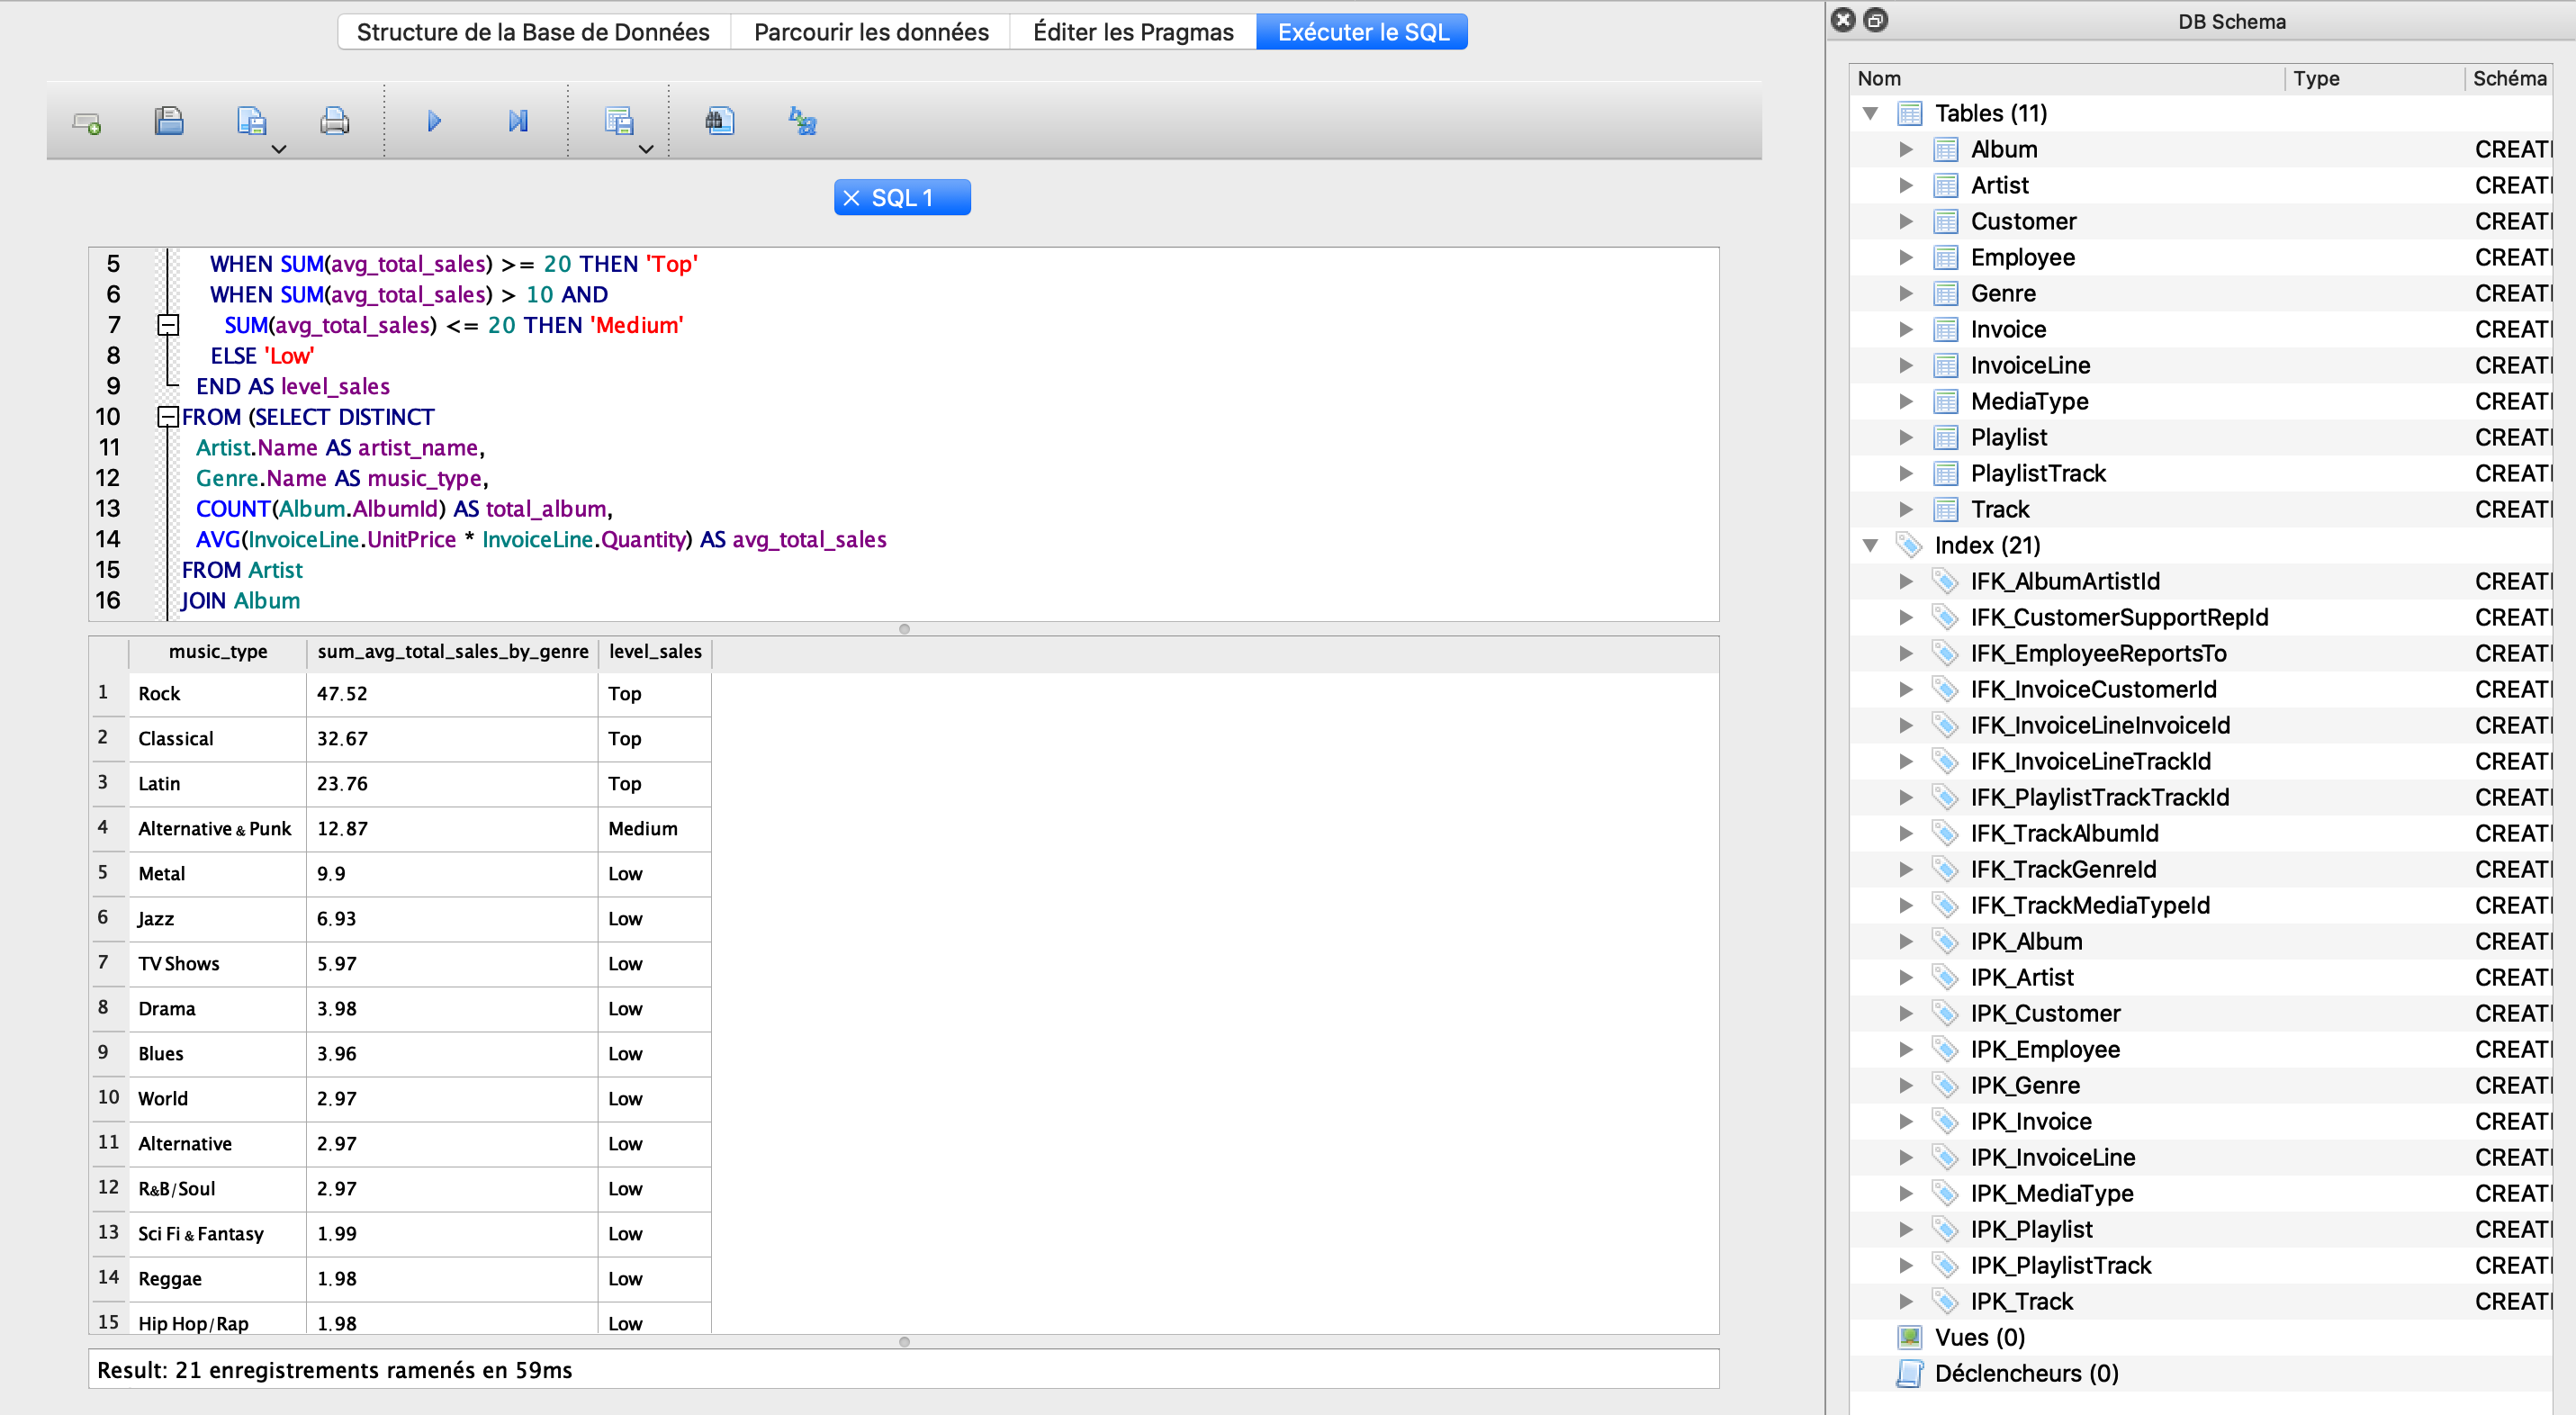

## Which country was the best buyer in 2009?

In [ ]:
SELECT

  Customer.Country,

  SUM(InvoiceLine.UnitPrice * InvoiceLine.Quantity) AS Total_sales

FROM Artist

JOIN Album

  ON Artist.ArtistId = Album.ArtistId

JOIN Track

  ON Album.AlbumId = Track.AlbumId

JOIN Genre

  ON Track.GenreId = Genre.GenreId

JOIN InvoiceLine

  ON Track.TrackId = InvoiceLine.TrackId

JOIN Invoice

  ON InvoiceLine.InvoiceId = Invoice.InvoiceId

JOIN Customer

  ON Invoice.CustomerId = Customer.CustomerId

WHERE Invoice.InvoiceDate BETWEEN '2009-01-01' AND '2009-12-26'

GROUP BY 1

ORDER BY 2 DESC;

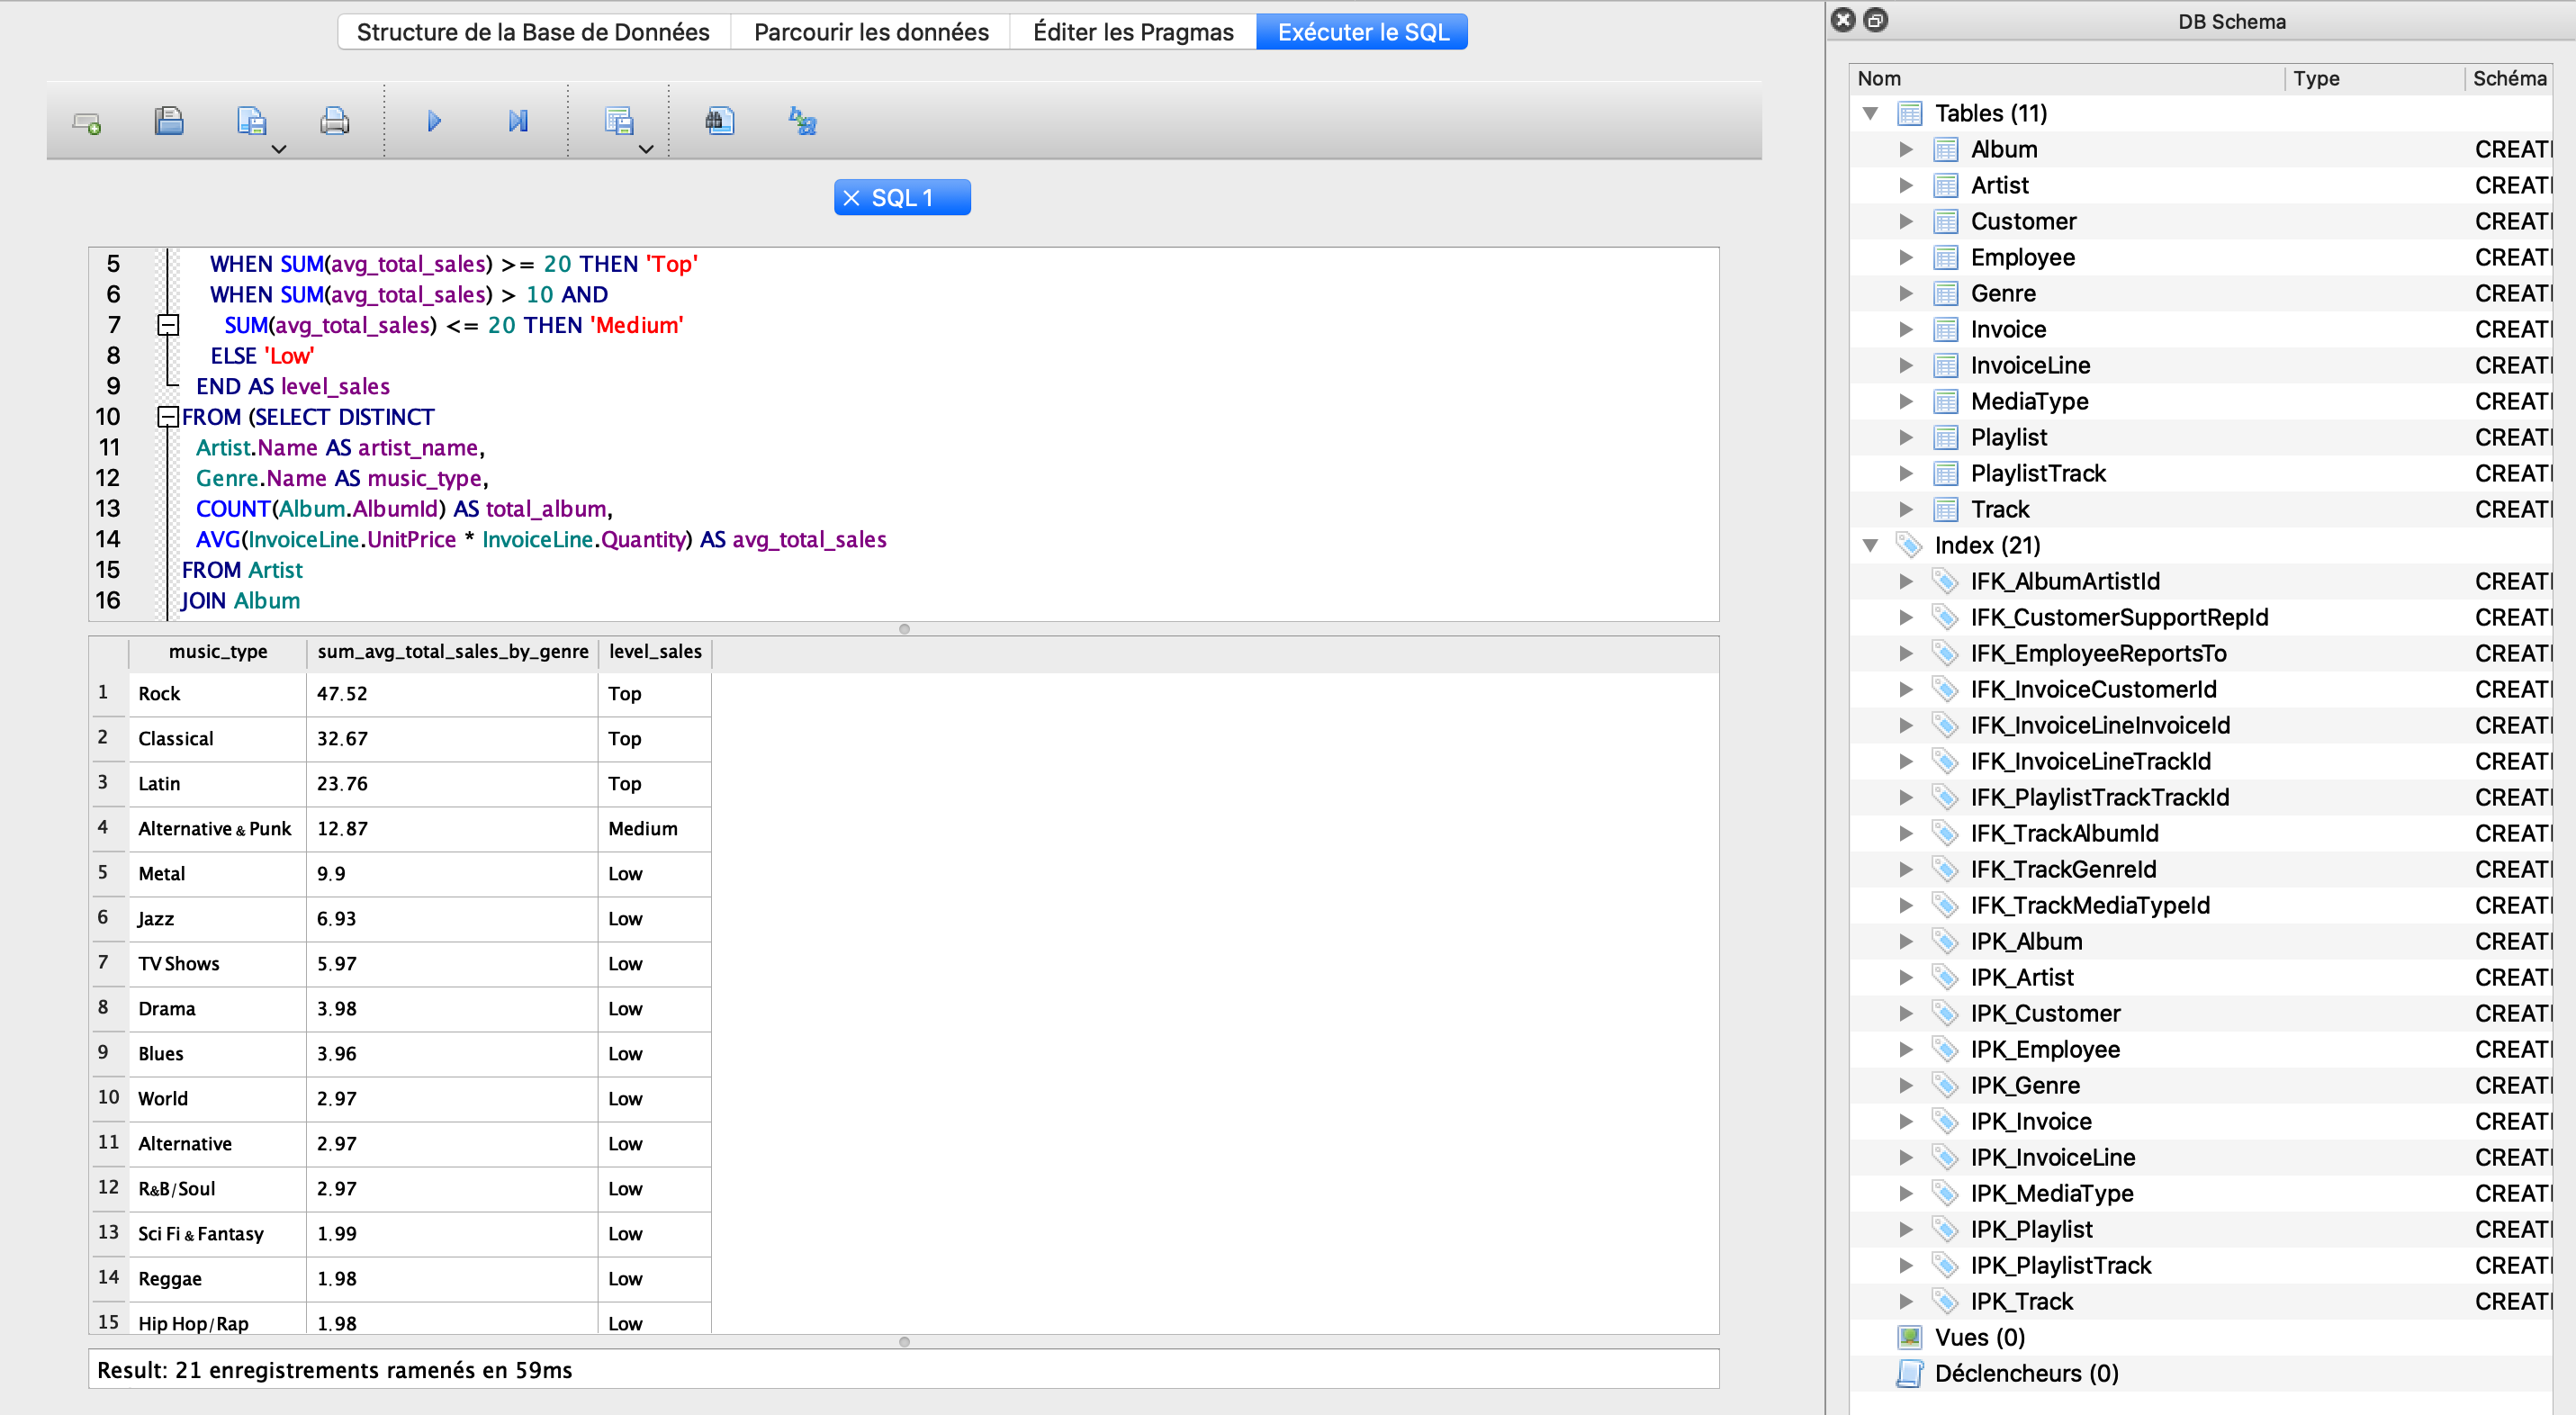

Looking at the total sales in 2009 from our InvoiceLine database, it turns out that the United-States were far ahead in terms of turnover with 104 USD in total. It is 54,8 percent more than their second market, Canada (57 USD). It makes the USA a major market in 2009 in terms of sales. 

If the company wished to organize a concert with musics related to the 2000s, we can tell them that the USA, Canada and Germany should be the top 3 regions to put their marketing efforts. 

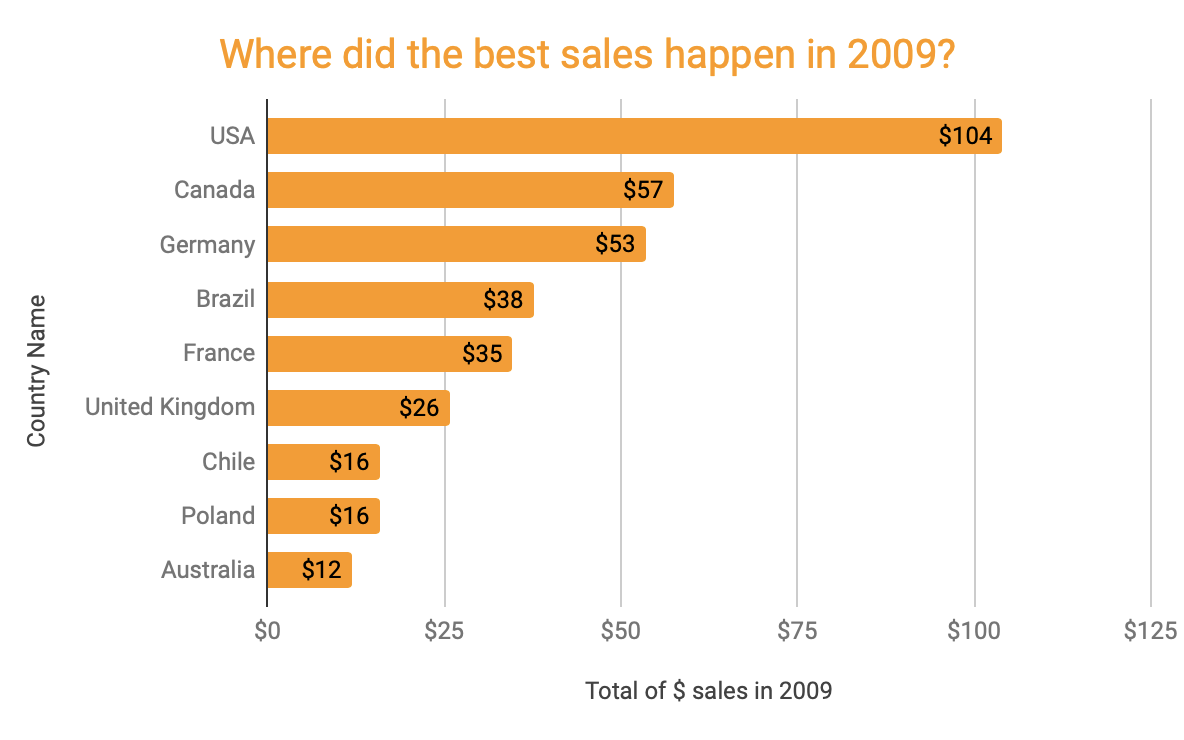

## Which was the most popular album ever sold on the playlist?

In [ ]:
SELECT Genre.Name AS Music_Genre, 
Artist.Name AS Artist_Name, 
Album.Title AS Album_Title, 
SUM (InvoiceLine.InvoiceId) AS Total_Buy

FROM Artist

JOIN Album

  ON Artist.ArtistId = Album.ArtistId

JOIN Track

  ON Album.AlbumId = Track.AlbumId

JOIN Genre

  ON Track.GenreId = Genre.GenreId

JOIN InvoiceLine

  ON Track.TrackId = InvoiceLine.TrackId

JOIN Invoice

  ON InvoiceLine.InvoiceId = Invoice.InvoiceId

JOIN Customer

   ON Invoice.CustomerId = Customer.CustomerId

 GROUP BY Music_Genre, Artist_Name, Album_Title

 ORDER BY Total_Buy DESC

LIMIT 15;

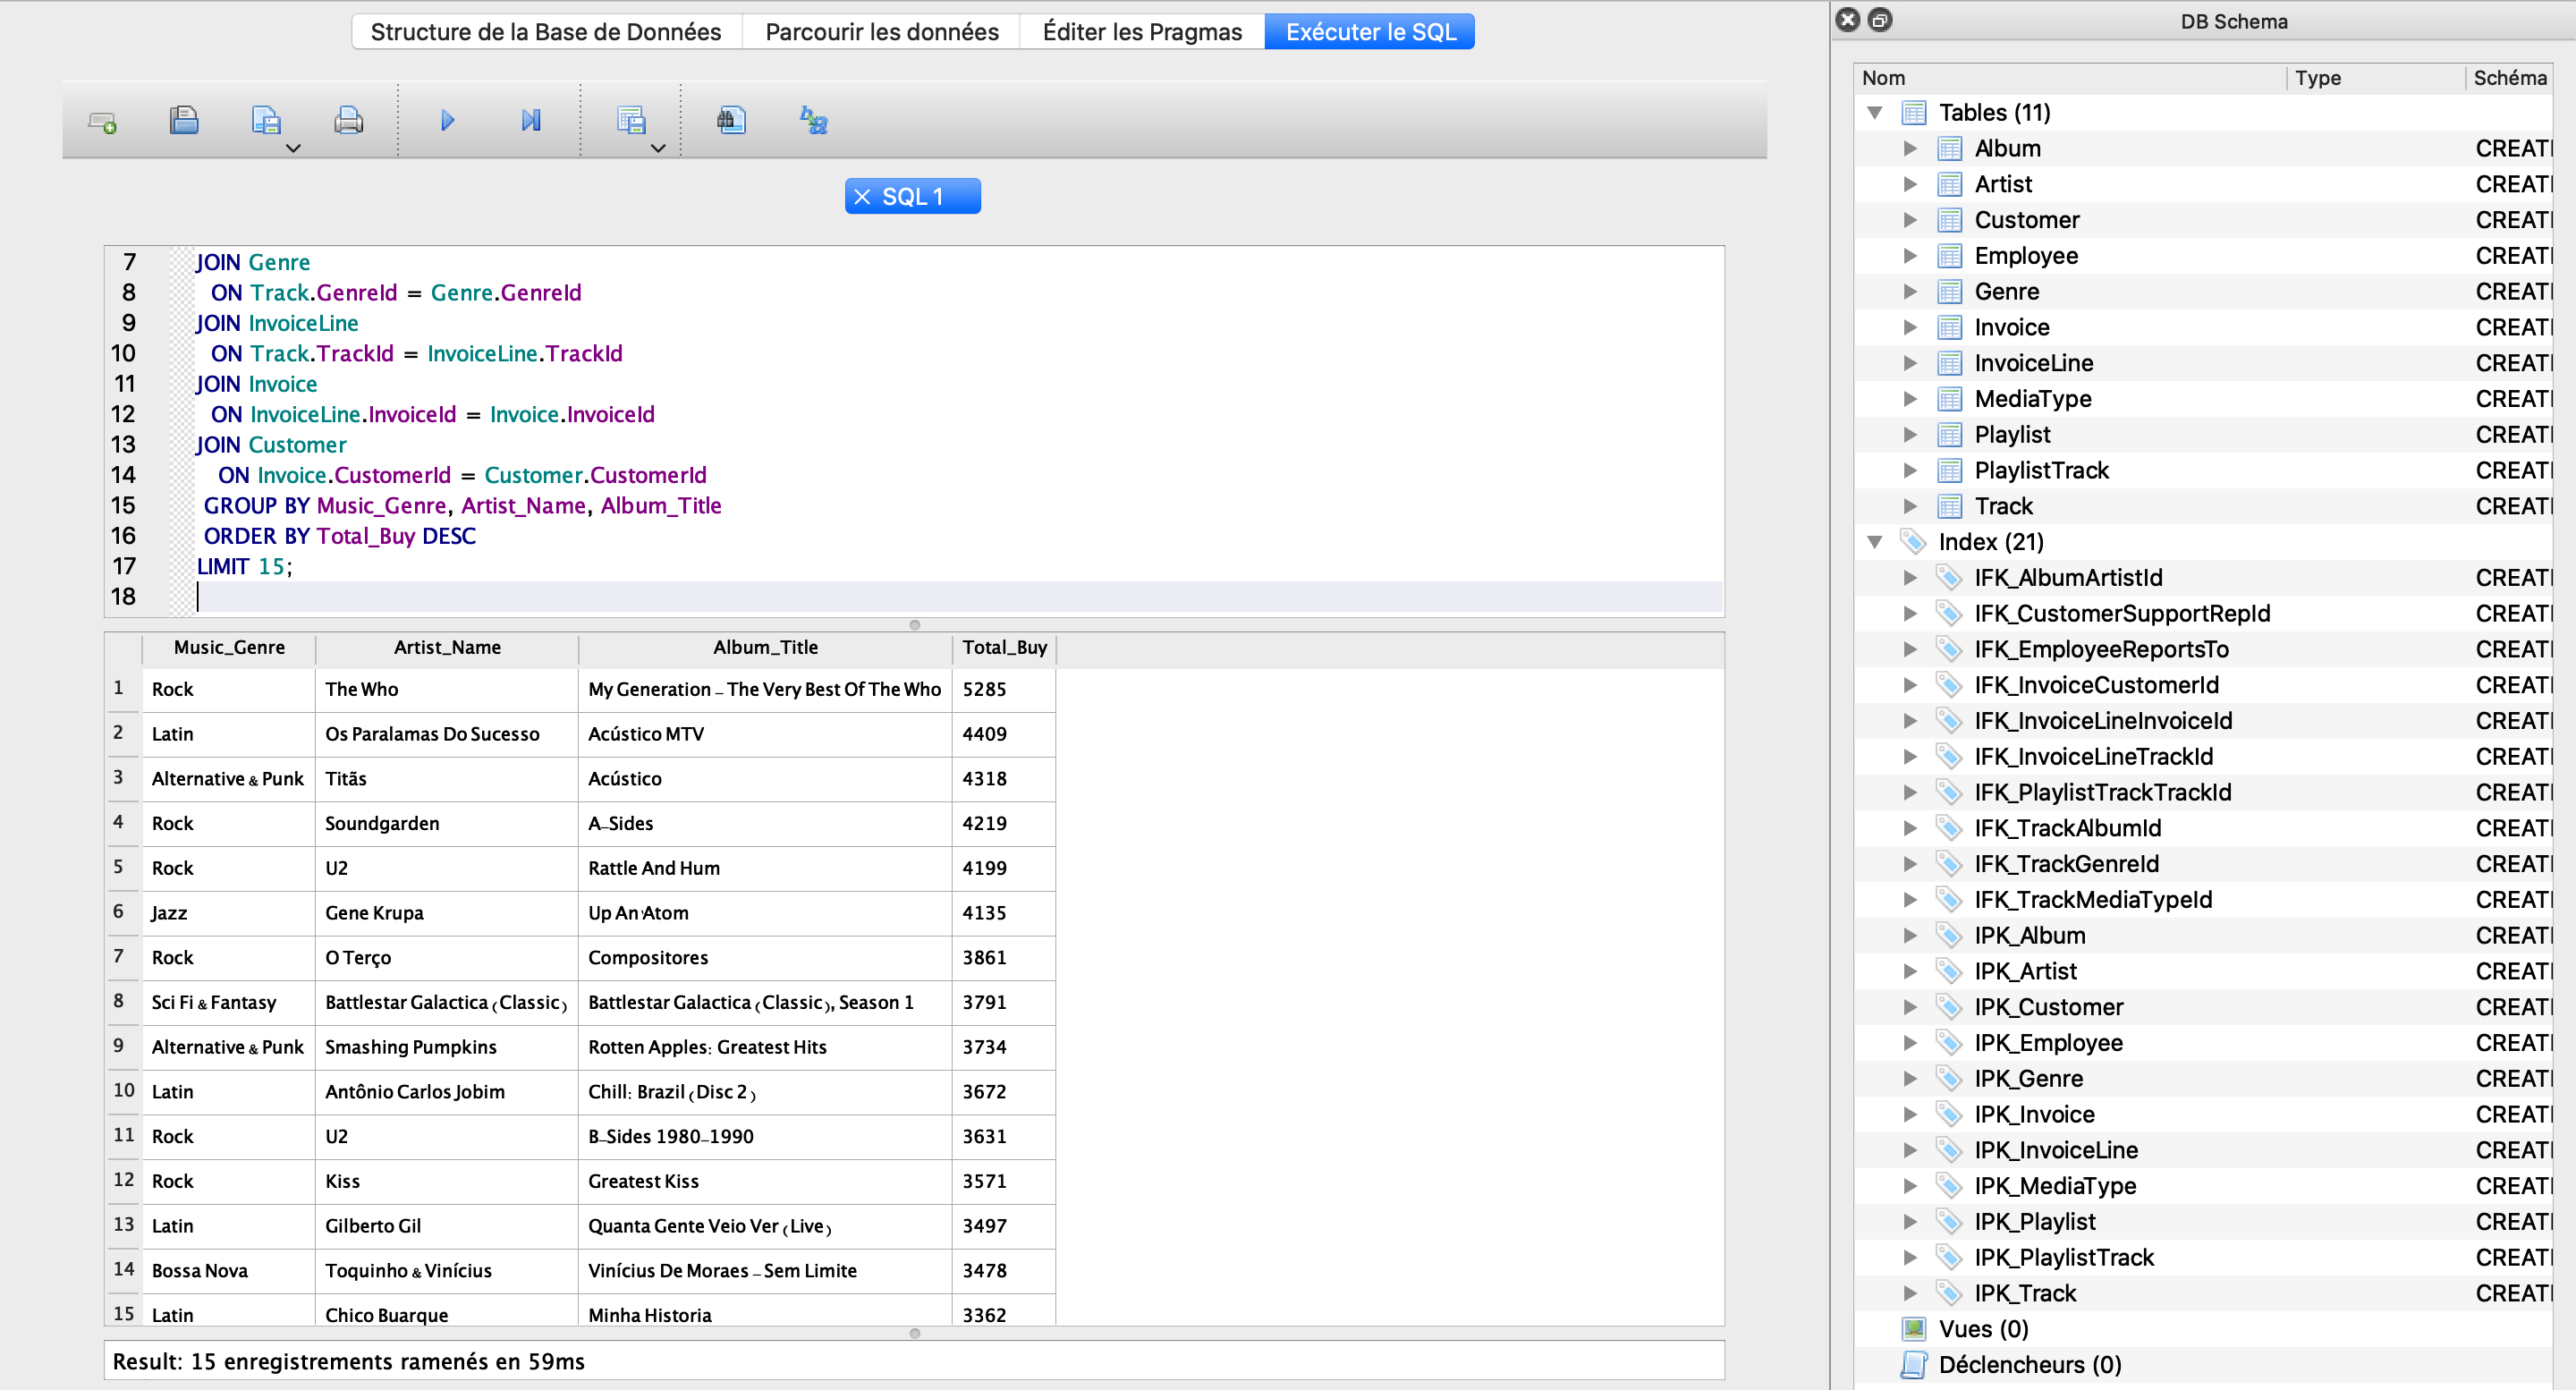

Looking into the Chinook database, we asked what was the best album ever sold since the beginning. It turns out that the album with the most sales is My Generation - The Very Best Of The Who from the Group The Who, released in 1996. It is a Rock Type music and collaborates or other insights as Rock being the most popular genre in the database.

The turnover generated by My Generation - The Very Best Of The Who was $5,285, it is 83% more than their second best album Acústico MTV (4,409 USD) of Latin genre.

This could be useful from a marketing point of view to promote other albums from the group.

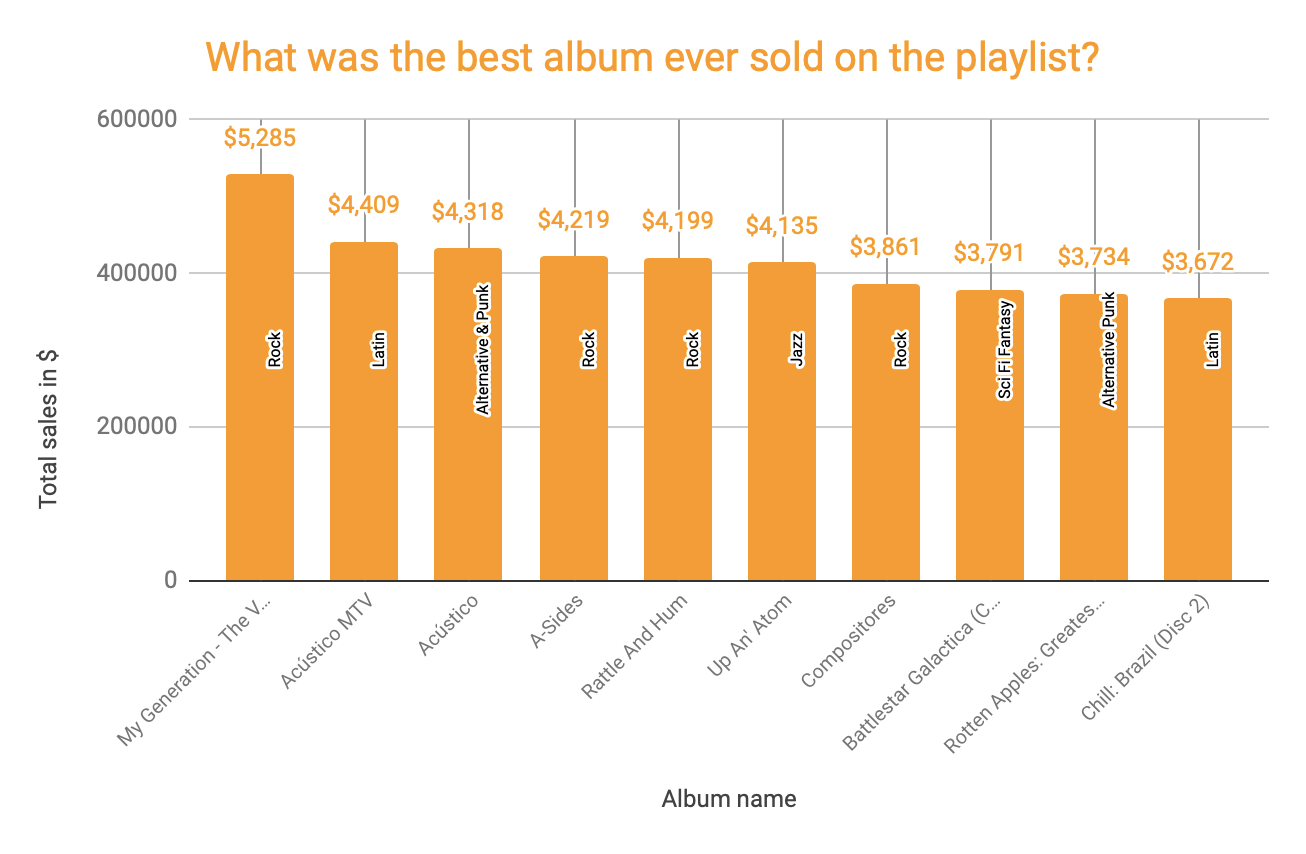

## Who was the employee with the most buys and their favorite genre?

In [ ]:
SELECT DISTINCT

  Employee.FirstName,

  Employee.LastName,

  Genre.Name AS Music_Type,

  SUM(InvoiceLine.UnitPrice * InvoiceLine.Quantity) AS Total_buy

FROM Artist

JOIN Album

  ON Artist.ArtistId = Album.ArtistId

JOIN Track

  ON Album.AlbumId = Track.AlbumId

JOIN Genre

  ON Track.GenreId = Genre.GenreId

JOIN InvoiceLine

  ON Track.TrackId = InvoiceLine.TrackId

JOIN Invoice

  ON InvoiceLine.InvoiceId = Invoice.InvoiceId

JOIN Customer

  ON Invoice.CustomerId = Customer.CustomerId

JOIN Employee

  ON Customer.SupportRepId = EmployeeId

GROUP BY 1,

         2,

         3

ORDER BY 4 DESC;

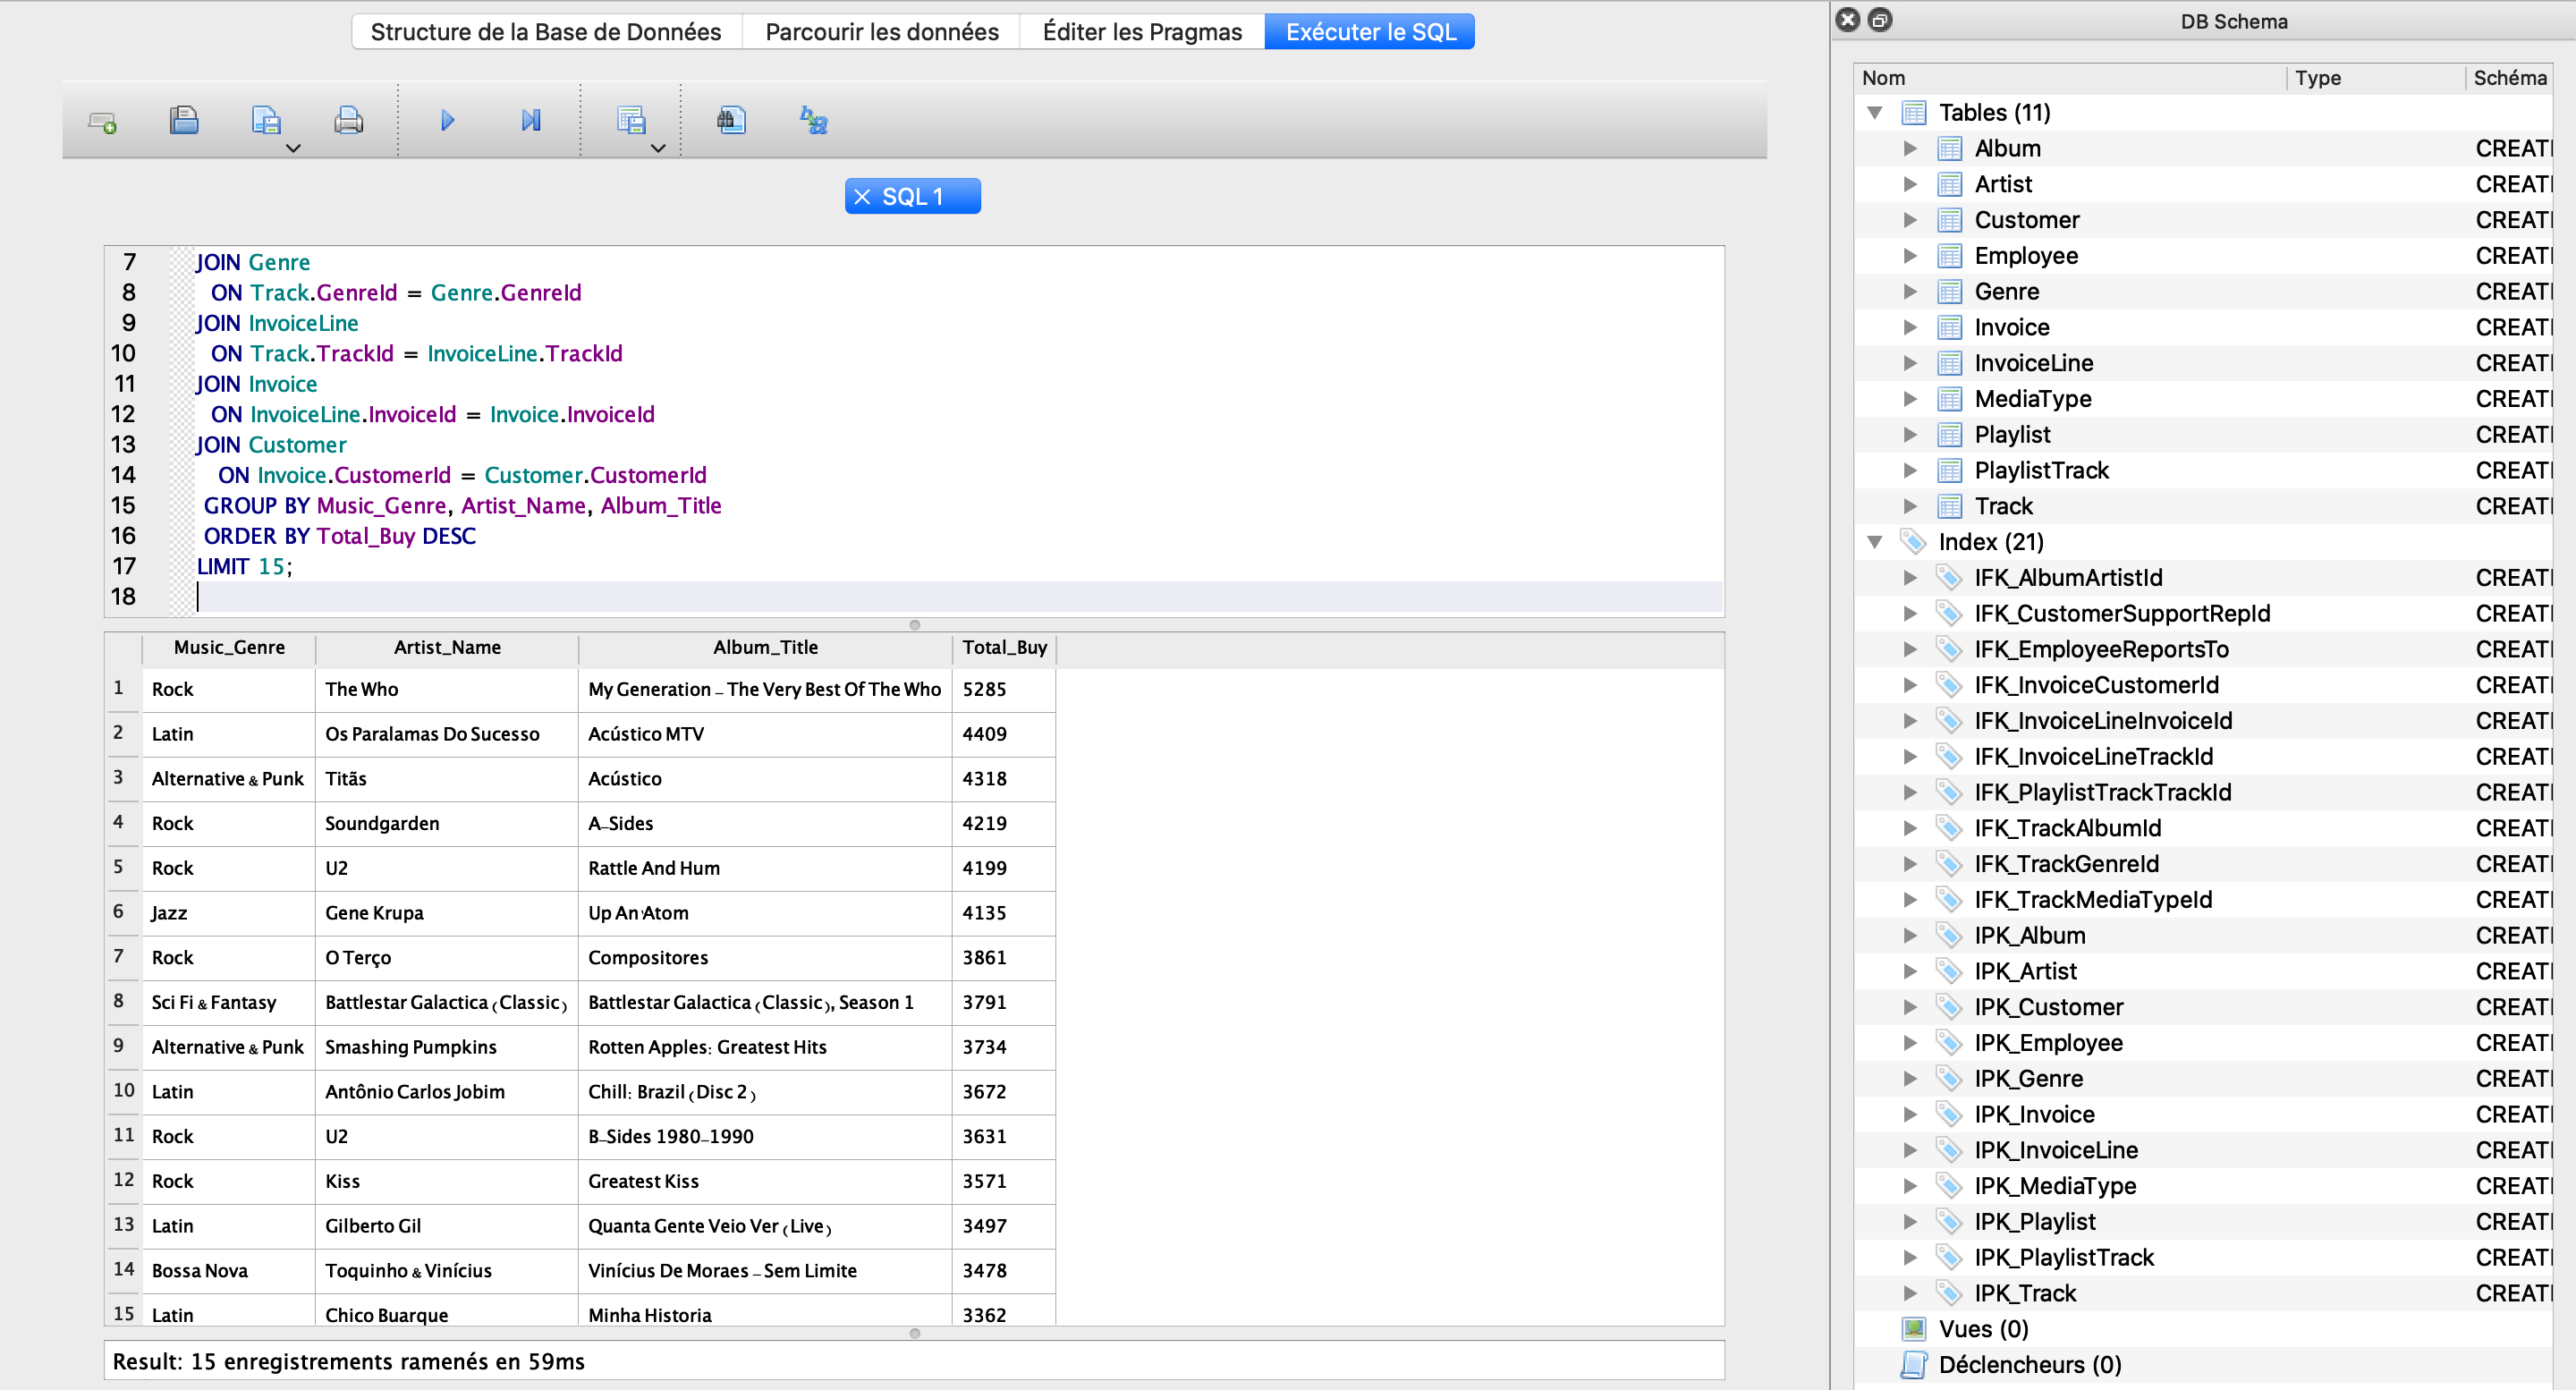

We asked if employees were also customers. It turns out that out of the 8 employees of the company, 3 (name on the bar charts) from the sales team bought different kind of music genres.

The top three sales were for rock music and Jane Peacock was the employee with the most buys with $ 301 in this music genre.

If the company was to start an internal communication campaign, these employees could be rewarded with some kind of free pass to buy a rock album of their choice for free for instance.

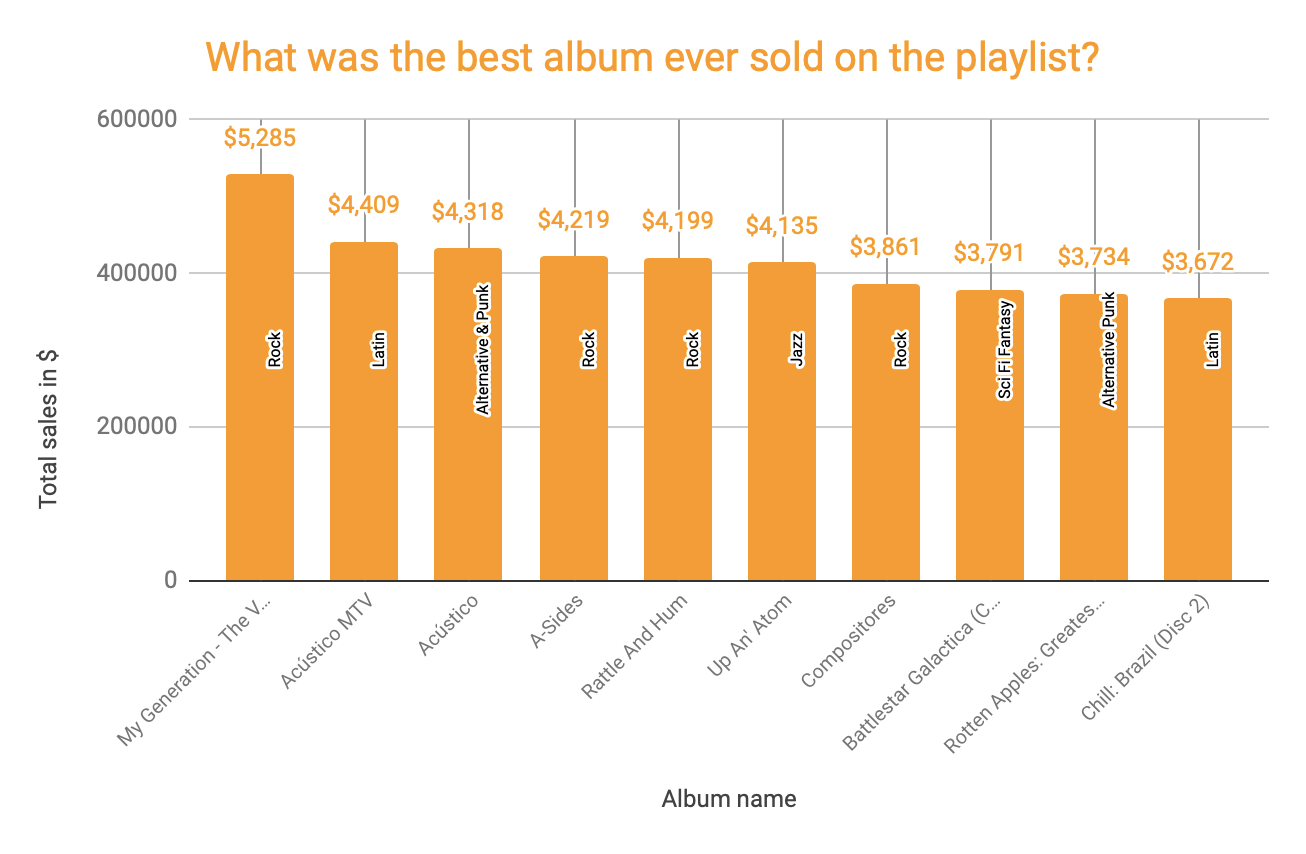